In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

transactions=pd.read_csv("transactions.csv")
test=pd.read_csv("test.csv")
oil=pd.read_csv("oil.csv")
holidays_events=pd.read_csv("holidays_events.csv")

In [2]:
stores=pd.read_csv("stores.csv")

In [3]:
train=pd.read_csv("train.csv")

In [4]:
train_with_stores = pd.merge(stores, train, on='store_nbr', how='left')

In [5]:
train_with_stores_tran = pd.merge(transactions, train_with_stores, on=['store_nbr','date'], how='right')

In [6]:
train_with_stores_tran_oil = pd.merge(oil, train_with_stores_tran, on='date', how='right')
train_with_stores_tran_oil.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000888 entries, 0 to 3000887
Data columns (total 12 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   date          3000888 non-null  object 
 1   dcoilwtico    2072466 non-null  float64
 2   store_nbr     3000888 non-null  int64  
 3   transactions  2755104 non-null  float64
 4   city          3000888 non-null  object 
 5   state         3000888 non-null  object 
 6   type          3000888 non-null  object 
 7   cluster       3000888 non-null  int64  
 8   id            3000888 non-null  int64  
 9   family        3000888 non-null  object 
 10  sales         3000888 non-null  float64
 11  onpromotion   3000888 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 297.6+ MB


In [7]:
train_with_stores_tran_oil_holy = pd.merge(holidays_events, train_with_stores_tran_oil, on='date', how='right')

In [8]:
train_group=train_with_stores_tran_oil_holy.groupby('id').first().reset_index()
rows_to_drop = train_group.sample(n=2999000)
train_group = train_group.drop(rows_to_drop.index)

/tmp/ipykernel_13933/4141399532.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_group.corr(),cmap="YlGnBu")


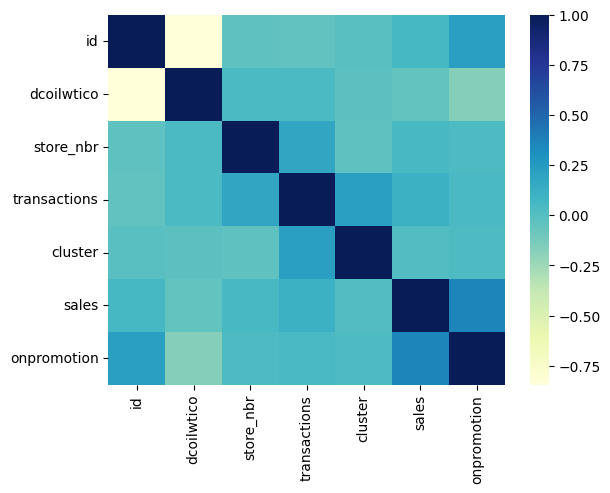

In [9]:
import seaborn as sns

sns.heatmap(train_group.corr(),cmap="YlGnBu")
plt.show()

In [10]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
matrix=encoder.fit_transform(train_group[["type_x"]]).toarray()
colum_names=train_group["type_x"].unique()
for i in range(len(matrix.T)):
    train_group[colum_names[i]]=matrix.T[i]


In [11]:
encoder=OneHotEncoder()
matrix=encoder.fit_transform(train_group[["transferred"]]).toarray()
colum_names=train_group["transferred"].unique()
for i in range(len(matrix.T)):
    train_group[colum_names[i]]=matrix.T[i]
train_group

,id,date,type_x,locale,locale_name,description,transferred,dcoilwtico,store_nbr,transactions,...,onpromotion,None,Work Day,Holiday,Additional,Event,Transfer,Bridge,False,True
2095,2095,2013-01-02,None,None,None,None,None,93.14,18,1635.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5691,5691,2013-01-04,None,None,None,None,None,93.12,19,1003.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7653,7653,2013-01-05,Work Day,National,Ecuador,Recupero puente Navidad,False,NaN,23,1250.0,...,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7978,7978,2013-01-05,Work Day,National,Ecuador,Recupero puente Navidad,False,NaN,32,890.0,...,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8589,8589,2013-01-05,Work Day,National,Ecuador,Recupero puente Navidad,False,NaN,5,1643.0,...,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996666,2996666,2017-08-13,None,None,None,None,None,NaN,40,1095.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2997996,2997996,2017-08-14,None,None,None,None,None,47.59,28,1064.0,...,56,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2998926,2998926,2017-08-14,None,None,None,None,None,47.59,53,895.0,...,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3000503,3000503,2017-08-15,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,48,2722.0,...,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [12]:
train_group['dcoilwtico'] = train_group['dcoilwtico'].interpolate(method='linear',limit_direction='both')
train_group["transactions"].fillna(train_group["transactions"].mean(), inplace=True)
train_group.drop(["transferred","type_x","description","locale_name","locale","city","state"],axis=1,errors="ignore",inplace=True)
train_group.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1888 entries, 2095 to 3000697
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1888 non-null   int64  
 1   date          1888 non-null   object 
 2   dcoilwtico    1888 non-null   float64
 3   store_nbr     1888 non-null   int64  
 4   transactions  1888 non-null   float64
 5   type_y        1888 non-null   object 
 6   cluster       1888 non-null   int64  
 7   family        1888 non-null   object 
 8   sales         1888 non-null   float64
 9   onpromotion   1888 non-null   int64  
 10  None          1888 non-null   float64
 11  Work Day      1888 non-null   float64
 12  Holiday       1888 non-null   float64
 13  Additional    1888 non-null   float64
 14  Event         1888 non-null   float64
 15  Transfer      1888 non-null   float64
 16  Bridge        1888 non-null   float64
 17  False         1888 non-null   float64
 18  True          1888 non

In [13]:
##sns.heatmap(train_group.corr(),cmap="YlGnBu")
#plt.show()

In [14]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
matrix=encoder.fit_transform(train_group[["type_y"]]).toarray()
colum_names=train_group["type_y"].unique()
for i in range(len(matrix.T)):
    train_group[colum_names[i]]=matrix.T[i]


In [15]:
encoder=OneHotEncoder()
matrix=encoder.fit_transform(train_group[["family"]]).toarray()
colum_names=train_group["family"].unique()
for i in range(len(matrix.T)):
    train_group[colum_names[i]]=matrix.T[i]
train_group.drop(["type_y","family","date"],axis=1,errors="ignore",inplace=True)

In [16]:
train_group

,id,dcoilwtico,store_nbr,transactions,cluster,sales,onpromotion,None,Work Day,Holiday,...,HARDWARE,GROCERY II,LADIESWEAR,CLEANING,BEAUTY,MAGAZINES,SEAFOOD,PLAYERS AND ELECTRONICS,MEATS,BOOKS
2095,2095,93.140,18,1635.0,16,0.000,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5691,5691,93.120,19,1003.0,15,0.000,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7653,7653,93.136,23,1250.0,9,0.000,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7978,7978,93.152,32,890.0,3,183.000,0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8589,8589,93.168,5,1643.0,4,288.754,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996666,2996666,47.834,40,1095.0,3,2.000,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997996,2997996,47.590,28,1064.0,10,6050.031,56,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998926,2998926,47.590,53,895.0,13,182.000,6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3000503,3000503,47.570,48,2722.0,14,122.000,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
#train_group.to_csv("result.csv",index=False)

In [18]:
train_group.columns = train_group.columns.astype(str)
from sklearn.model_selection import train_test_split
X_train_sales=train_group.drop("sales",axis=1)
y_train_sales=train_group["sales"]
X_train, X_test, y_train, y_test = train_test_split(X_train_sales, y_train_sales, random_state=0)

In [19]:

#y_train.columns = y_train.columns.astype(str)
#from sklearn.linear_model import LinearRegression
#lin_reg = LinearRegression()
#ln_reg.fit(X_train, y_train)

In [20]:
#y_linreg=lin_reg.predict(X_test)
#y_linreg

In [21]:
#from sklearn.metrics import f1_score
#f1_score(y_test,y_linreg)

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


# Визначення гіперпараметрів
param_grid = {
    'n_estimators': [2000],
    'max_depth': [30],
    'max_features': ['auto']
}

# Побудова моделі
rf = RandomForestRegressor(random_state=42)

# Використання GridSearchCV для обрання найкращих параметрів
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1)

In [23]:

grid_search.fit(X_train, y_train)

# Найкращі параметри
print("Найкращі параметри: ", grid_search.best_params_)




/home/uliana/Desktop/Курси/Prog/titanic/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Найкращі параметри:  {'max_depth': 30, 'max_features': 'auto', 'n_estimators': 2000}


In [24]:
# Передбачення за допомогою найкращої моделі
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Оцінка рівня помилки
mse = mean_squared_error(y_test, y_pred)
print("Середньоквадратична помилка: ", mse)

Середньоквадратична помилка:  4264528.937516151


In [25]:
errors = abs(y_pred - y_test)
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Average absolute error: 235.72 degrees.
Accuracy: -inf %.


In [26]:
y_pred

array([2.60662644e+00, 4.19683919e+02, 4.71558544e+00, 3.19394142e+02,
       2.22360863e-01, 1.68536500e+03, 1.62937517e+03, 5.79861093e+00,
       3.95202294e+01, 3.06760545e+00, 3.30984039e-01, 7.93119234e+01,
       8.83902139e+00, 2.74639416e+00, 2.41876392e+03, 7.31130088e+02,
       1.48350000e+02, 5.17926254e-01, 3.50838708e+02, 8.70246500e+02,
       1.26049000e+02, 4.27796259e+00, 1.51482000e+02, 1.91631862e+00,
       2.61244620e+00, 4.67632069e+00, 1.03861200e+03, 2.82249154e-01,
       5.14373298e+03, 8.45135560e-02, 1.86865334e+00, 6.13188087e+00,
       2.15735281e+00, 5.37819194e+01, 1.32253000e+02, 2.06042472e+00,
       2.84372883e+02, 3.26062998e+03, 1.58000852e+01, 1.48578832e+01,
       4.01992489e+00, 1.76407724e-01, 1.60848247e+03, 3.16594924e+02,
       1.92298187e+02, 1.94181353e+02, 1.40854500e+02, 1.97162932e+02,
       1.71716424e+00, 3.97903243e+00, 3.08825819e+02, 2.34838736e+00,
       1.70447000e+02, 4.15633550e+03, 1.39197225e+01, 7.51100000e+01,
      

In [27]:
 y_test

944408       0.00000
1951252    780.27997
1655510     17.53100
2483806    274.86200
108964       0.00000
             ...    
2502549      5.00000
1538002      0.00000
1033326      2.00000
2994791    771.00000
980657       0.00000
Name: sales, Length: 472, dtype: float64

In [28]:
errors

944408       2.606626
1951252    360.596051
1655510     12.815415
2483806     44.532142
108964       0.222361
              ...    
2502549      0.121924
1538002      0.535055
1033326    692.817172
2994791     10.941054
980657      56.174712
Name: sales, Length: 472, dtype: float64

In [35]:
train_group[-52:].values

array([[2.942047e+06, 4.606000e+01, 8.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [2.943336e+06, 4.653000e+01, 4.400000e+01, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [2.943397e+06, 4.653000e+01, 4.500000e+01, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [2.998926e+06, 4.759000e+01, 5.300000e+01, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [3.000503e+06, 4.757000e+01, 4.800000e+01, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [3.000697e+06, 4.757000e+01, 5.300000e+01, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]])

In [37]:
from xgboost.sklearn import XGBRegressor
mod = XGBRegressor(n_estimators=100,learning_rate=0.2)
mod.fit(X_train, y_train)
y_pred = mod.predict(X_test)
errors = abs(y_pred - y_test)
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Average absolute error: 246.43 degrees.
Accuracy: -inf %.


In [30]:
!pip install xgboost
#from sklearn.ensemble import XGBRegressor
#XGBRegressor(n_estimators=100,learning_rate=0.2),
#mod = XGBRegressor(n_estimators=100,learning_rate=0.2)
#mod.fit(X_train, y_train)
#predictions = mod.predict(X_test)
#X_train, y_train, X_test, y_test, scaler_object = scale_data(X_train_sales, y_train_sales)
from sklearn.preprocessing import MinMaxScaler
from xgboost.sklearn import XGBRegressor
X_train_sales, y_train_sales = train_group.drop(["sales"],axis=1).values, train_group["sales"].values
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(X_train_sales)

    # reshape training set
X_train_sales = X_train_sales.reshape(X_train_sales.shape[0], X_train_sales.shape[1])
train_set_scaled = scaler.transform(X_train_sales)

    # reshape test set
y_train_sales = y_train_sales.reshape(y_train_sales.shape[0], y_train_sales[1])
test_set_scaled = scaler.transform(y_train_sales)

X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1].ravel()
X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1].ravel()

TypeError: 'numpy.float64' object cannot be interpreted as an integer